集成算法emsemble会考虑多个评估器的建模结果，汇总后得到一个综合结果，以此得到更好的回归或者分类表现。  
有三类集成算法：Bagging装袋法，Boosting提升法，stacking

Bagging袋装法：构建多个相互独立的评估器，然后对其预测进行平均或者多数表决原则来决定集成评估器的结果。  
代表模型就是随机森林。

Boosting提升法：基评估器是相关的，是按顺序一一构建的。其核心思想是结合弱评估器的力量一次次对难以评估的样本进行预测，从而构成一个强评估器。  
代表模型Adaboost和梯度提升树。

随机森林分类器

In [1]:
'''
n_estimators 森林中树的数量，基评估器的数量。越大，模型效果越好，但是计算量越大。0-200
'''
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

In [24]:
wine = load_wine()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)

In [25]:
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

clf = clf.fit(Xtrain, Ytrain)
rfc = rfc.fit(Xtrain, Ytrain)

score_c = clf.score(Xtest, Ytest)
score_r = rfc.score(Xtest, Ytest)

print("single tree score:{}".format(score_c)
      ,"random forest score:{}".format(score_r))

single tree score:0.9259259259259259 random forest score:0.9814814814814815


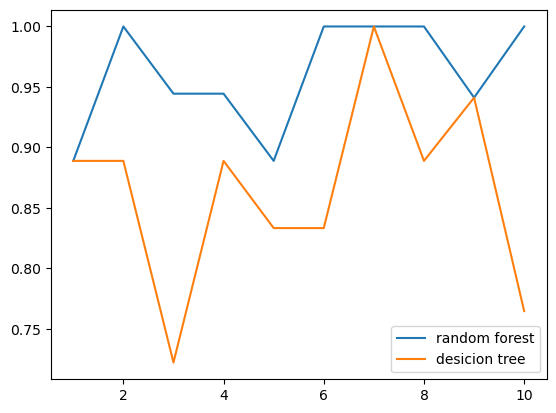

In [26]:
# 与交叉验证对比
rfc = RandomForestClassifier(n_estimators=20)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv = 10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf, wine.data, wine.target, cv = 10)

plt.plot(range(1,11), rfc_s, label = "random forest")
plt.plot(range(1,11), clf_s, label = "desicion tree")
plt.legend()
plt.show()

In [ ]:
# # 一种有趣的写法
# label = "random forest"
# for model in [RandomForestClassifier(n_estimators=20), DecisionTreeClassifier()]:
#     score = cross_val_score(model, wine.data, wine.target, cv = 10)
#     print("{}:".format(label)),print(score.mean())
#     plt.plot(range(1,11), score, label = label)
#     plt.legend()
#     label = 'Desicion tree'

In [27]:
# 画n_estimators学习曲线
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1, n_jobs=-1)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv = 10).mean()
    superpa.append(rfc_s)

print(max(superpa), superpa.index(max(superpa)))
plt.figure()
plt.plot(range(1,201), superpa)
plt.show()

KeyboardInterrupt: 

In [ ]:
# 画出随机森林和决策树在10foldCV下的效果对比
rfc_sc = []
clf_sc = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv = 10).mean()
    rfc_sc.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf, wine.data, wine.target, cv = 10).mean()
    clf_sc.append(clf_sc)

plt.plot(range(1,11), rfc_sc, label = "Random forest")
plt.plot(range(1,11), clf_sc, label = "decision tree")
plt.legend()
plt.show()

In [10]:
import numpy as np
from scipy.special import comb

np.array([comb(25, i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

In [ ]:
# 随机森林的random state固定的是生成的森林的模式 中间的每一棵树时无法固定的
rfc = RandomForestClassifier(n_estimators=20, random_state=2)
rfc = rfc.fit(Xtrain, Ytrain)
# 随机森林的重要属性之一：estimators，查看森林中树的状况
rfc.estimators_[0].random_state
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

In [ ]:
'''
bootstrap：控制抽样技术的参数。使用不同的训练集来进行训练。
其参数默认为True，代表采用有放回的随机抽样技术。
在这种条件下，样本永远不会被抽到的概率为1-(1-1/n)^n
约有37%的样本被“浪费”掉，没有参与建模，相当于掉落在了袋外(out of bag data)
也就是说，使用随机森林的时候，可以不划分测试集和训练集，只需要使用袋外的数据来测我们的模型。
但是如果n和n_estimators都不够大，很可能没有数据掉落在袋外，
我们就可以将
oob_score调整为True，然后用
oob_score_来查看我们的模型在袋外数据上测试的结果
'''
# 无需划分测试集和训练集
rfc = RandomForestClassifier(n_estimators=25, oob_score=True)
rfc = rfc.fit(wine.data, wine.target)

rfc.oob_score_


In [ ]:
'''
还有.feature_importances_这个属性
'''

随机森林的接口与决策树完全一致，依然有四个常用接口：  
apply,fit,predict,score。除此之外，还有  
predict_proba，这个接口返回每个测试样本对应的被分到每一类标签的概率，标签有几种就返回几个概率。


In [ ]:
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)
rfc.score(Xtest, Ytest)

In [ ]:
rfc.feature_importances_


In [ ]:
rfc.apply(Xtest)
# 返回这个样本在这棵树中叶子节点的索引

In [ ]:
rfc.predict(Xtest)
# 返回对测试集预测的标签
# 实际上score对比的就是这个预测出来的标签与实际的Ytest之间的差异

In [ ]:
rfc.predict_proba(Xtest)
# 返回每一个训练样本被分到每一个标签的概率

Bonus：Bagging的另一个必要条件  
基分类器的正确率至少要超过随机分类器（50%）

In [ ]:
x = np.linspace(0, 1, 20)
y = []

for epsilon in np.linspace(0, 1, 20):
    E = np.array([comb(25, i)*(epsilon**i)*((1-epsilon)**(25-i)) for i in range(13, 26)]).sum()
    y.append(E)

plt.plot(x, y, label = "when eatimators are different")
# 当基分类器各不相同，随着基分类器的误差越来越大，随机森林的误差增大，且增速有变化
# 单个树的错误率超过0.5，那么随机森林表现比单棵树还差

plt.plot(x, x, label = "if all estimators are same")
# 当所有树都相同，就是基分类器的表现
plt.xlabel("individual estimator's error")
plt.ylabel("Randomforesr's error")
plt.legend()
plt.show()


随机森林回归器

所有的属性、参数、接口和随机森林分类树一致。

In [ ]:
'''
criterion:
mse 最小化L2损失
friedman_mse
mae 最下滑L1损失
'''

In [5]:
from sklearn.datasets import fetch_california_housing
cali = fetch_california_housing()
cali.data.shape
#  一个标签是连续型变量的数据集

(20640, 8)

In [34]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
cross_val_score(regressor, cali.data, cali.target, cv = 10
                , scoring = "neg_mean_squared_error"
                )

array([-0.7489673 , -0.39129145, -0.53799885, -0.2570691 , -0.43499701,
       -0.36253114, -0.31458624, -0.61644386, -0.7014064 , -0.26750123])

In [ ]:
# sklearn中的模型评估指标列表
from sklearn import metrics
sorted(metrics.get_scorer_names())  # 返回排序后的指标列表

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_max_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 're

用随机森林填充缺失值

In [21]:
# 用来填补缺失值
import pandas as pd
from sklearn.impute import SimpleImputer

In [6]:
dataset = fetch_california_housing()
# dataset.data.shape
Xfull, Yfull = dataset.data, dataset.target
n_samples = Xfull.shape[0]
n_features = Xfull.shape[1]
n_samples
n_features

8

In [11]:
# 为完整的数据集放入缺失值
# 首先确定我们希望放入的缺失数据的比例
rng = np.random.RandomState(0)      # 随机数种子
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))
n_missing_samples

82560

In [12]:
# 所有数据要随机遍布在数据集的各行各列中，而一个缺失的数据会需要一个行索引和一个列索引
# 创造一个数组，包含n_missing_samples个分布在0-20640的行索引和0-8的列索引
# 然后用0、均值、随机森林来填写缺失值
# 然后查看回归效果如何

missing_features = rng.randint(0, n_features, n_missing_samples)
missing_samples = rng.randint(0, n_samples, n_missing_samples)
# len(missing_features)
# len(missing_samples)

# 我们现在采样了82506组数据，远远超过我们的样本量20640，所以我们使用随机抽取函数
missing_samples = rng.randint(0, n_samples, n_missing_samples)
missing_samples.shape

(82560,)

In [13]:
X_missing = Xfull.copy()
Y_missing = Yfull.copy()

X_missing[missing_samples, missing_features] = np.nan

In [14]:
X_missing = pd.DataFrame(X_missing)
# Ymissing不能确实，因为有监督学习标签不能缺失

In [16]:
# 填补缺失值
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_missing_mean = imp_mean.fit_transform(X_missing) # 训练fit+导出predict
# 使用0填补
imp_0 = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value = 0)
X_missing_0 = imp_0.fit_transform(X_missing)

In [17]:
# 确认填补完无空值
pd.DataFrame(X_missing_mean).isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [18]:
'''
使用随机森林回归器来填补缺失值（不常用）
对一个有n个特征的数据来说，其中特征T有缺失值，我们就把特征T当作标签，其他的n-1个特征和原本的标签放在一起作为一个新的特征矩阵。
那对于T来说，它没有缺失的部分，就是我们的Y_train，这部分数据既有标签也有特征，而它缺失的部分，只有特征没有标签，就是我们需要预测的部分。

特征T不缺失的值对应的其他n-1个特征 + 本来的标签：X_train
特征T不缺失的值：Y_train

特征T缺失的值对应的其他n-1个特征 + 本来的标签：X_test
特征T缺失的值：未知，我们需要预测的Y_test

这种做法对于某一个特征大量确实，其他特征却很完整的情况，非常适用。

那如果数据中除了特征T之外，其他特征也有缺失值怎么办？
遍历所有特征，从缺失最少的开始进行填补（因为填补缺失这最少的特征所需要的准确信息最少）。
填补一个特征时，先将其他特征的缺失值用0代替，每完成一次回归预测，就将预测值放到原本的特征矩阵中，再继续填补下一个特征。
每一次填补完毕，有缺失值的特征会减少一个，所以每次循环后，需要用0来填补的特征就越来越少。
当进行到最后一个特征时（也就是缺失值最多的一个特征），已经没有任何其他的特征需要用0来进行填补了，
而我们已经使用回归为其他特征填补了大量有效信息，可以用来填补缺失最多的特征。
'''
X_missing_reg = X_missing.copy()
# 返回的是按需排序后的索引
sortindex = np.argsort(X_missing_reg.isnull().sum(axis = 0)).values
sortindex

array([1, 7, 0, 2, 6, 5, 4, 3], dtype=int64)

In [23]:
for i in sortindex:
    # 构建我们的新特征矩阵（没有被选中去填充的特征 + 原始的标签）和新标签（被选中去填充的特征）
    df = X_missing_reg
    # 新标签
    fillc = df.iloc[:, i]
    # 新特征矩阵
    df = pd.concat([df.iloc[:, df.columns != i], pd.DataFrame(Yfull)], axis = 1)

    # 在新特征矩阵中，对含有缺失值的列进行0填补
    df_0 = SimpleImputer(missing_values = np.nan
    ,strategy = 'constant', fill_value = 0).fit_transform(df)

    # 找出训练集和测试集
    # 是被选中要填充的特征中（现在是我们的标签）存在的那些非空值
    Ytrain = fillc[fillc.notnull()]
    # 是被选中要填充的特征中的空值
    Ytest = fillc[fillc.isnull()]
    # 在新特征矩阵上，被选出来的要填充的特征的非空值所对应的记录
    Xtrain = df_0[Ytrain.index, :]
    # 新特征矩阵上，被选出来的要填充的那个特征的空值所对应的记录
    Xtest = df_0[Ytest.index, :]

    #用随机森林回归填补缺失值
    rfc = RandomForestRegressor(n_estimators=10)
    rfc = rfc.fit(Xtrain, Ytrain)
    Ypredict = rfc.predict(Xtest)

    # 将填补好的特征返回原始特征矩阵中
    X_missing_reg.loc[X_missing_reg.iloc[:, i].isnull(), i] = Ypredict


In [25]:
X_missing_reg.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [28]:
# 下面对比用0、mean、reg方法填充的效果

# 对所有数据建模，取得MSE
x = [Xfull, X_missing_mean, X_missing_0, X_missing_reg]
mse = []
std = []
for x in x:
    estimators = RandomForestRegressor(random_state=0, n_estimators=10)
    scores = cross_val_score(estimators, x, Yfull, scoring='neg_mean_squared_error', cv = 3
).mean()
    mse.append(scores * -1)
mse

[0.4925594697059337,
 0.8670408756075471,
 0.904971548188028,
 0.32917858432006547]

In [ ]:
[*zip(["full", "mean", "0", "reg"], mse)]
# 回归的mse最小

[('full', 0.4925594697059337),
 ('mean', 0.8670408756075471),
 ('0', 0.904971548188028),
 ('reg', 0.32917858432006547)]

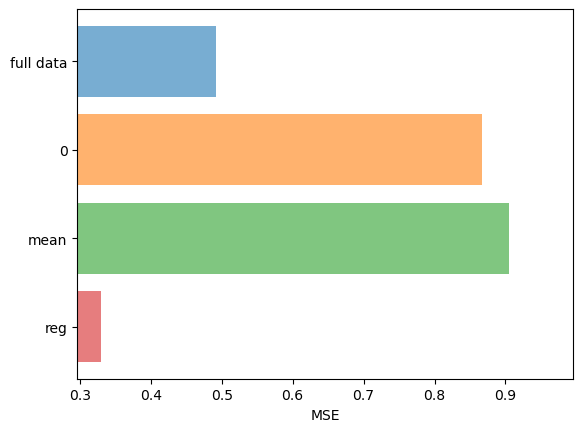

In [36]:
x_labels = ['full data', '0', 'mean', 'reg']
plt.figure()
ax = plt.subplot(111)
for i in np.arange(len(mse)):
    ax.barh(i, mse[i], alpha = 0.6, align='center')

ax.set_xlim(left = np.min(mse) * 0.9
             ,right = np.max(mse) * 1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.invert_yaxis()
ax.set_yticklabels(x_labels)
plt.show()